In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
from glob import glob
import re
from collections import defaultdict

def extract_and_combine(file: str, combine: bool=False):
    '''Collect and combine data
    
    params
    ======
    
    file:
        File name with wild (*) to search for.
    combine:
        Flag for whether returning combined dataframe of history.
    '''
    
    data = {} # Experiment -> results
    
    # Convert file wildcard into valid RegEx wildcard
    pattern = file.replace('*', '(.*)')

    # Collect every pickle file and load into data dictionary
    for f in glob(file):
        match = re.search(pattern, f)
        experiment = match.group(1).strip()
        with open(f, 'rb') as jar:
            data[experiment] = pickle.load(jar)
    
    # Combines the data into a singlue dictionary.
    if combine:
        combined_history =  defaultdict(list)
        for exp_num, _dict in data.items():
            for key, value in _dict['history'].items():
                combined_history[key].append(value[0])
            
        #history_frames = [pd.DataFrame(_dict['history']) for _dict in list(data.values())]
        return data, combined_history
    else:
        return data

In [3]:
data, history_SPECT = extract_and_combine(file='results/SPECT_*_results.pkl', combine=True)
SPECT_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
SPECT_data = {'score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_SPECT.items():
    if n_buckets == 'L': # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        SPECT_data['score'].append(score)
        SPECT_data['buckets'].append(100 - n_buckets)
        SPECT_data['n_run'].append(n_run)
        

In [4]:
SPECT_data

{'score': [0.7962962962962963,
  0.5555555555555556,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7592592592592593,
  0.7777777777777778,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7592592592592593,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7962962962962963,
  0.7777777777777778,
  0.7962962962962963,
 

In [5]:
# Plot Configuration
height = 4
aspect = 12/7

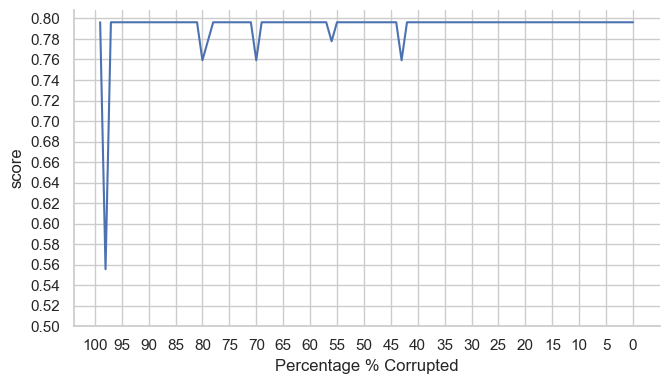

In [15]:
ax = sns.relplot(data=SPECT_data, kind='line', x='buckets', y='score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(0.5, .8, 16))
plt.xlabel("Percentage % Corrupted")
plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
ax.figure.savefig('SPECT_percent.png', dpi=200)